# Drug response prediction system for Acute myeloid leukemia 
Acute myeloid leukemia (AML) is a cancer of the myeloid line of blood cells, characterized by the rapid growth of 
abnormal white blood cells that build up in the bone marrow and interfere with the production of normal blood cells.
AML is the most common acute leukemia affecting adults, and its incidence increases with age. 
Although AML is a relatively rare disease, accounting for roughly 1.2% of cancer deaths in the United States,its incidence 
is expected to increase as the population ages.
Here we tried to predict drug response of the the Genomics feature of the patient.
If we can successfully predict the response before chemotherapy we may save few more life. 
We have used dataset from TCGA portal https://cancergenome.nih.gov/
However for feature selection we selected only those genes which are well published in scietific literature published

In [23]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import shelve
# Pretty display for GO-Hack
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset
in_file = 'C:\Users\kabya\Documents\TCGA_MDS_DATASET.csv'
full_data = pd.read_csv(in_file)
full_data.columns=["Patient ID", "PIK3 Mutation", "AKR1C3 Mutation", "UBE2V1 Mutation","MSH1 Mutation","MLH1 Mutation","KIT Overexpression","cytarabine Response","AGE(In Years)"]
full_data['drug_response']=np.where(full_data['cytarabine Response']=='CR',1,0)
newfull_data=full_data.drop('cytarabine Response',1)
# Print the first few entries of the TCGA data
display(full_data.head())

,Patient ID,PIK3 Mutation,AKR1C3 Mutation,UBE2V1 Mutation,MSH1 Mutation,MLH1 Mutation,KIT Overexpression,cytarabine Response,AGE(In Years),drug_response
0,TCGA-AB-2931,1,0,1,1,1,1,CR,34,1
1,TCGA-AB-2877,1,0,1,1,1,1,CR,35,1
2,TCGA-AB-2819,1,0,0,1,1,1,CR,36,1
3,TCGA-AB-3005,1,0,0,1,1,1,CR,37,1
4,TCGA-AB-2853,1,0,0,1,1,1,CR,38,1


From a sample of the TCGA geneomics data, we can see the various features present for each Patient ID:
- **cytarabine Response**: Outcome the drug cytrabine (CR = Responder; PR = Non-Responder)
- **PIK3 Mutation**: If PIK3 Mutation is present in the patient(0 = NO; 1 = Yes)
- **AKR1C3 Mutation**: If AKR1C3 Mutation is present in the patient(0 = NO; 1 = Yes)
- **UBE2V1 Mutation**: If UBE2V1 Mutation is present in the patient(0 = NO; 1 = Yes)
- **MSH1 Mutation**: If MSH1 Mutation is present in the patient(0 = NO; 1 = Yes)
- **MLH1 Mutation**: If MLH1 Mutation is present in the patient(0 = NO; 1 = Yes)
- **KIT Overexpression**: If KIT Overexpression is present in the patient(0 = NO; 1 = Yes)
- **AGE(In Years)**: Age of the patient

Below we will plot the correation between our different features vector and Target.

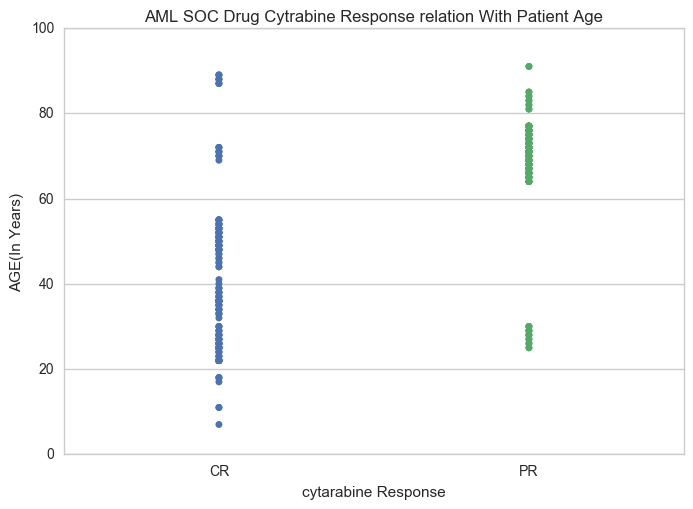

In [27]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="cytarabine Response", y="AGE(In Years)", data=full_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With Patient Age')

In [143]:
newfull_data.columns

Index([u'Patient ID', u'PIK3 Mutation', u'AKR1C3 Mutation', u'UBE2V1 Mutation',
       u'MSH1 Mutation', u'MLH1 Mutation', u'KIT Overexpression',
       u'AGE(In Years)', u'drug_response'],
      dtype='object')

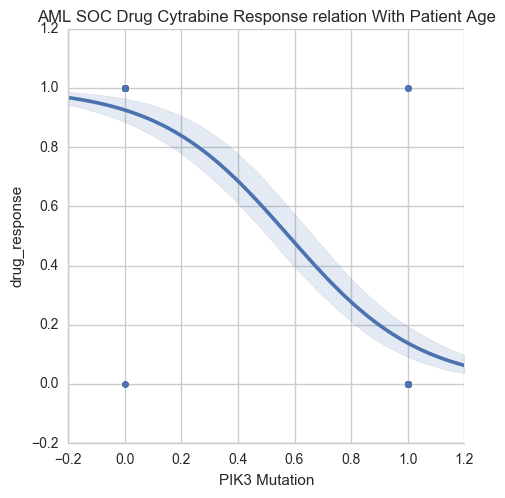

In [66]:
sns.lmplot(x="PIK3 Mutation",y="drug_response",logistic=True, data=newfull_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With Patient Age')

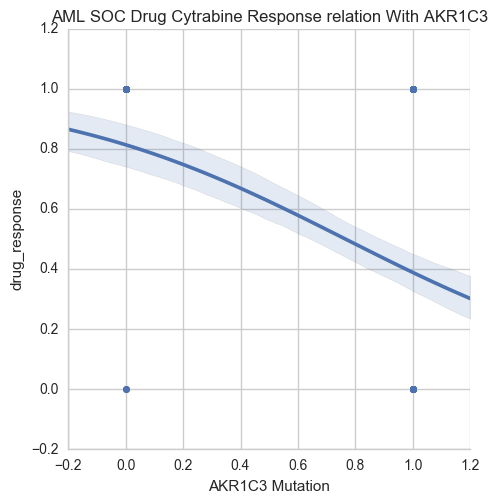

In [78]:
sns.lmplot(x="AKR1C3 Mutation",y="drug_response",logistic=True, data=newfull_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With AKR1C3')

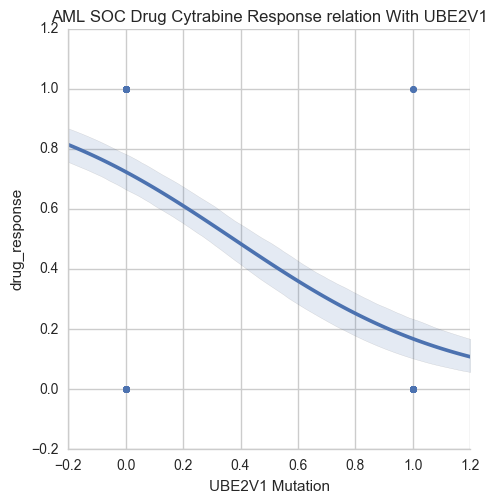

In [84]:
sns.lmplot(x="UBE2V1 Mutation",y="drug_response",logistic=True, data=newfull_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With UBE2V1')

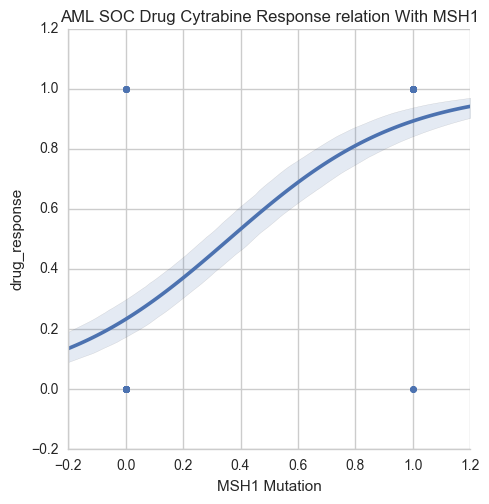

In [85]:
sns.lmplot(x="MSH1 Mutation",y="drug_response",logistic=True, data=newfull_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With MSH1')

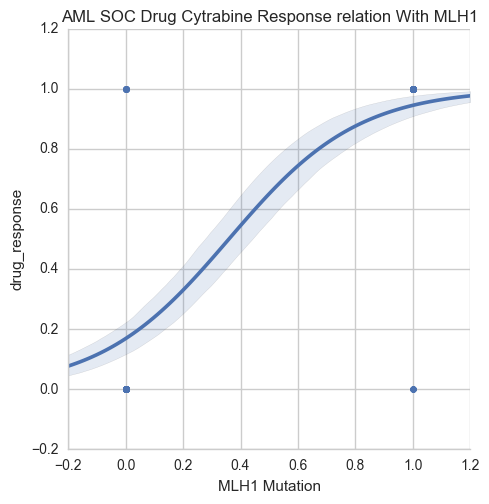

In [86]:
sns.lmplot(x="MLH1 Mutation",y="drug_response",logistic=True, data=newfull_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With MLH1')

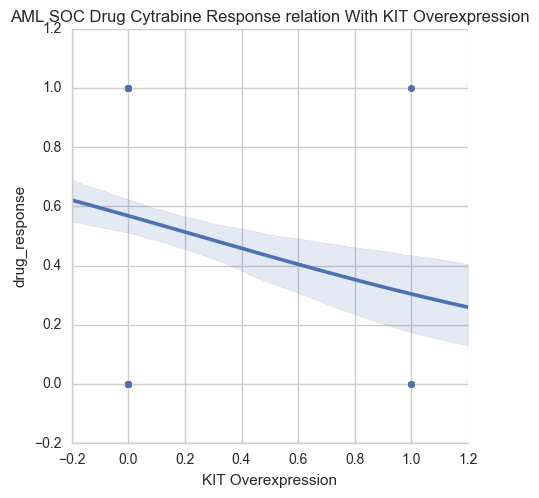

In [91]:
sns.lmplot(x="KIT Overexpression",y="drug_response",logistic=True, data=newfull_data)
sns.plt.title('AML SOC Drug Cytrabine Response relation With KIT Overexpression')

Conclusion from the plot

The Above plot clearly suggest that above the age of 60 the response of the drug is low.
PIK3,AKR1C3 and UBE2V1 Mutation inversely correlated with the DRug Response
MLH1 and MSH1 positively correlated with drug response 
KIT overesprrsion don not revel much from lm plot however we will see if it adds value to the model

In [28]:
#Spliting of the dataset into feature and Target
newfull_data=newfull_data.drop('Patient ID', axis=1)
newfull_data=newfull_data.drop('AGE(In Years)', axis=1)
#newfull_data=newfull_data.drop['Patient ID',axis=1]
features = newfull_data[newfull_data.columns[0:len(newfull_data.axes[1])-1]]
target = newfull_data[newfull_data.columns[len(newfull_data.axes[1])-1:]]

display(target.head())

,drug_response
0,1
1,1
2,1
3,1
4,1


In [17]:
from sklearn import cross_validation
# Shuffling and spliting the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features,target,random_state=0,test_size=0.4)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

print clf.score(X_test, y_test)

0.992805755396


The model predicted test data set with 99.28% accurecy , however this can be due to the overfitting of the data.
This prject has scope of using other algorithm and better dataset. 

We will try top print the decission tree here

In [214]:
tree.export_graphviz(clf,
    out_file='tree.dot')

In [11]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph
#graph.write_pdf("Tree.pdf")